# PROJET PYTHON DATA SCIENTIST

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

def refresh():
    path_data = 'train.json'
    data = pd.read_json(path_data)
    return (data)

df = refresh()

In [4]:
df.tail()

id                                             band_1  \
1599  04e11240  [-30.999878, -29.976866, -28.233906, -29.50732...   
1600  c7d6f6f8  [-25.31155, -26.511555, -28.694487, -27.180115...   
1601  bba1a0f1  [-18.141895, -18.141844, -19.01737, -19.701599...   
1602  7f66bb44  [-22.455633, -25.794661, -26.954567, -22.83354...   
1603  9d8f326c  [-19.909191, -20.678406, -20.208834, -18.42441...   

                                                 band_2 inc_angle  is_iceberg  
1599  [-27.847719, -28.233864, -24.712077999999998, ...        na           0  
1600  [-29.563713, -28.290375, -26.839405, -28.29046...        na           0  
1601  [-25.305355, -29.387701, -28.963863, -26.16023...        na           0  
1602  [-26.070356, -22.093737, -21.577662, -24.53376...        na           0  
1603  [-24.44487, -24.956001, -27.722103, -26.078417...        na           0

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [10]:
plt.style.use('ggplot')
%matplotlib inline

In [20]:
ex_ice = df[df.is_iceberg == 1].sample(n=100)
ex_shi = df[df.is_iceberg == 0].sample(n=100)

In [21]:
def to_RGB(arr):
    normalized = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    im = Image.fromarray(plt.cm.jet(normalized, bytes = True))
    im = im.resize((300, 300), Image.ANTIALIAS)
    return (im)

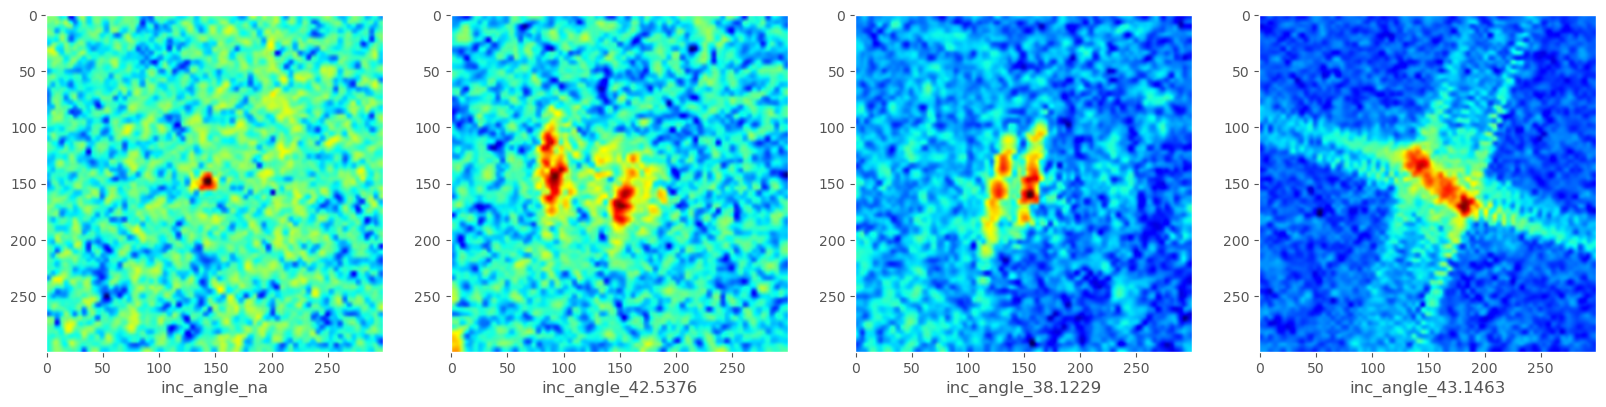

In [105]:
fig = plt.figure(figsize = (20,20))

for i in range(4):  
    ax = fig.add_subplot(2,4,i+5)
    arr = np.reshape(np.array(ex_shi.iloc[i,1]),(75,75))
    im = to_RGB(arr)
    ax.grid(False)
    ax.imshow(im)
    ax.set_xlabel("inc_angle_"+str(ex_shi.iloc[i,3]))

plt.show()

In [107]:
data = refresh()

In [108]:
data.head()

id                                             band_1  \
0  dfd5f913  [-27.878360999999998, -27.15416, -28.668615, -...   
1  e25388fd  [-12.242375, -14.920304999999999, -14.920363, ...   
2  58b2aaa0  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  4cfc3a18  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  271f93f4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2 inc_angle  is_iceberg  
0  [-27.154118, -29.537888, -31.0306, -32.190483,...   43.9239           0  
1  [-31.506321, -27.984554, -26.645678, -23.76760...   38.1562           0  
2  [-24.870956, -24.092632, -20.653963, -19.41104...   45.2859           1  
3  [-27.889421, -27.519794, -27.165262, -29.10350...   43.8306           0  
4  [-27.206915, -30.259186, -30.259186, -23.16495...   35.6256           0

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB


In [111]:
data['inc_angle'] = pd.to_numeric(data['inc_angle'], errors = 'coerce')

In [112]:
data.isna().sum()

id              0
band_1          0
band_2          0
inc_angle     133
is_iceberg      0
dtype: int64

In [113]:
data = data.dropna()

In [114]:
n = data.shape[0]

In [120]:
b1 = np.array(data['band_1'])
b2 = np.array(data['band_2'])

ang = np.array(data['inc_angle'])

In [121]:
n

1471

In [122]:
ang

array([43.9239, 38.1562, 45.2859, ..., 34.4721, 37.9814, 35.2987])

In [127]:
X = [b1[i] + b2[i] + [ang[i]] for i in range(n)]

In [124]:
Y = np.array(data["is_iceberg"])

In [128]:
X = np.array(X)

In [129]:
X

array([[-27.878361, -27.15416 , -28.668615, ..., -28.672153, -29.095982,
         43.9239  ],
       [-12.242375, -14.920305, -14.920363, ..., -25.223524, -25.223581,
         38.1562  ],
       [-24.603676, -24.603714, -24.871029, ..., -25.72924 , -25.729279,
         45.2859  ],
       ...,
       [-23.945009, -23.316914, -25.883354, ..., -24.397905, -25.890652,
         34.4721  ],
       [-26.656988, -26.972933, -27.300798, ..., -25.502245, -27.646503,
         37.9814  ],
       [-16.241388, -17.401228, -18.385656, ..., -27.266531, -27.266531,
         35.2987  ]])

In [130]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [132]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.25 )   

In [135]:
from sklearn.model_selection import cross_val_score

best_c = None
best_s = 0

# SVM

from sklearn import svm
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVC(kernel = i, C = 1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5)
    print("Accuracy : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
    if scores.mean() > best_s:
        best_s = scores.mean()
        best_c = clf

Accuracy : 0.72 (+/- 0.08)
Accuracy : 0.61 (+/- 0.06)
Accuracy : 0.74 (+/- 0.07)
Accuracy : 0.59 (+/- 0.06)


In [136]:
#NN

from sklearn.neural_network import MLPClassifier
for i in range(5):
    clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10*(i+1),10*(i+1)), random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv=5) # cross-validation
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    if scores.mean()>best_s:
        best_s=scores.mean()
        best_c=clf = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (10*(i+1), 10*(i+1)), random_state = 1)
    

Accuracy: 0.75 (+/- 0.06)
Accuracy: 0.77 (+/- 0.08)
Accuracy: 0.75 (+/- 0.07)
Accuracy: 0.77 (+/- 0.08)
Accuracy: 0.76 (+/- 0.08)


In [137]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X_train, y_train, cv=5) # cross-validation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
if scores.mean()>best_s:
    best_s=scores.mean()
    best_c=clf

Accuracy: 0.69 (+/- 0.05)


In [138]:
best_c

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=1, solver='lbfgs')

In [139]:
best_c.fit(X_train, y_train)

print("Accuracy calculée sur la base d'entrainement : %0.2f"% best_c.score(X_train,y_train))
print("Accuracy calculée sur la base test : %0.2f"% best_c.score(X_test,y_test))

Accuracy calculée sur la base d'entrainement : 1.00
Accuracy calculée sur la base test : 0.77


## Traitement des images

In [140]:
data = refresh()

In [141]:
data.tail()

id                                             band_1  \
1599  04e11240  [-30.999878, -29.976866, -28.233906, -29.50732...   
1600  c7d6f6f8  [-25.31155, -26.511555, -28.694487, -27.180115...   
1601  bba1a0f1  [-18.141895, -18.141844, -19.01737, -19.701599...   
1602  7f66bb44  [-22.455633, -25.794661, -26.954567, -22.83354...   
1603  9d8f326c  [-19.909191, -20.678406, -20.208834, -18.42441...   

                                                 band_2 inc_angle  is_iceberg  
1599  [-27.847719, -28.233864, -24.712077999999998, ...        na           0  
1600  [-29.563713, -28.290375, -26.839405, -28.29046...        na           0  
1601  [-25.305355, -29.387701, -28.963863, -26.16023...        na           0  
1602  [-26.070356, -22.093737, -21.577662, -24.53376...        na           0  
1603  [-24.44487, -24.956001, -27.722103, -26.078417...        na           0

In [144]:
ex_ice = data[data.is_iceberg == 1].sample(100)
ex_shi = data[data.is_iceberg == 0].sample(100)

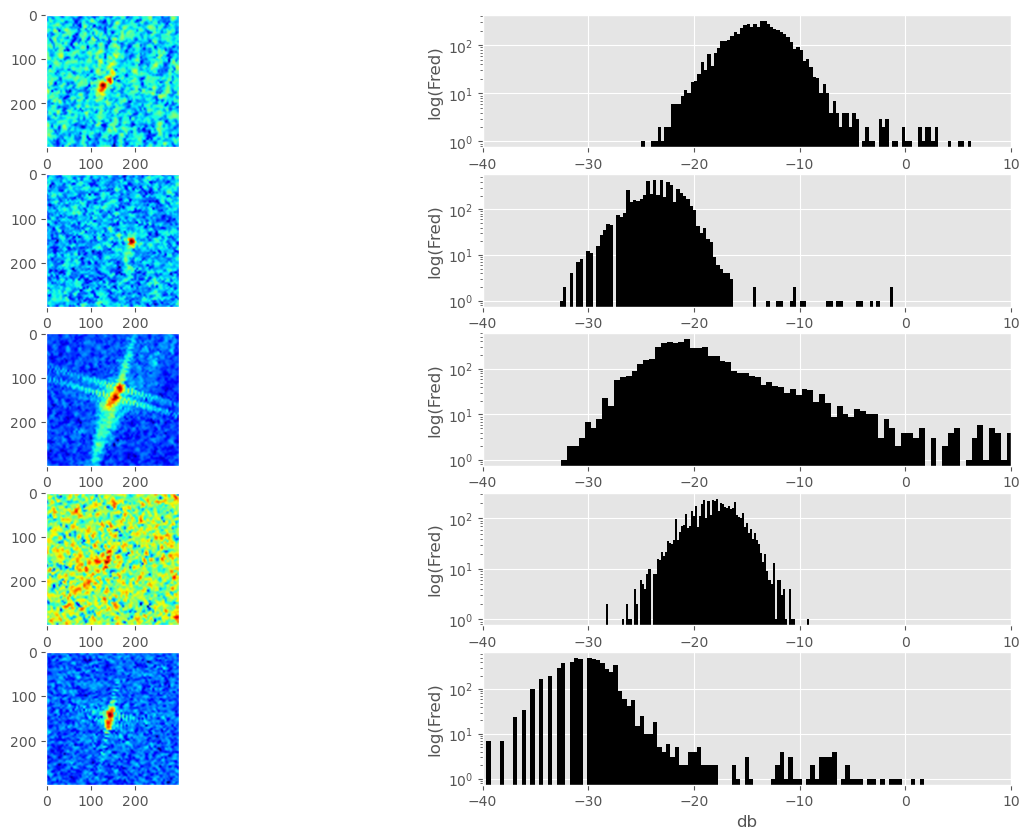

In [155]:
fig = plt.figure(figsize = (15, 10))

for i in [0, 2, 4, 6, 8]:
    #arr = np.reshape(np.array(ex_shi.iloc[i, 0], (75, 75)))
    arr = np.reshape(np.array(ex_shi.iloc[i,1]),(75,75))
    im = to_RGB(arr)
    ax = fig.add_subplot(5, 2, i+1)
    ax.grid(False)
    ax.imshow(im)
    hist = arr.ravel()
    ax = fig.add_subplot(5, 2, i+2)
    ax.hist(hist, bins = 100, color = "black")
    ax.set_yscale('log')
    ax.set_xlim([-40, 10])
    ax.set_xlabel("db")
    ax.set_ylabel("log(Fred)")
plt.show()

In [158]:
from PIL import Image
from skimage import filters, exposure, restoration, morphology, measure, segmentation
from scipy.ndimage import gaussian_filter
from skimage.filters.rank import median
from skimage import img_as_float

In [159]:
def maxPoolingLayer(arr, shape):
    sh = shape, arr.shape[0]//shape, shape, arr.shape[1]//shape
    y = arr.reshape(sh).max(-1).max(1)
    return (to_RGB(np.reshape(np.array(y.flatten()), (shape, shape))))

In [160]:
def meanPoolingLayer(arr, shape):
    sh = shape, arr.shape[0]//shape, shape, arr.shape[1]//shape
    y = arr.reshape(sh).mean(-1).mean(1)
    return (to_RGB(np.reshape(np.array(y.flatten()), (shape, shape))))

In [166]:
arr = np.reshape(np.array(data[data.is_iceberg == 0].iloc[5, 1]), (75, 75))
normalized = (arr-np.min(arr)) / (np.max(arr)-np.min(arr))

arr_uint = np.uint8(255*normalized)
im = to_RGB(arr)

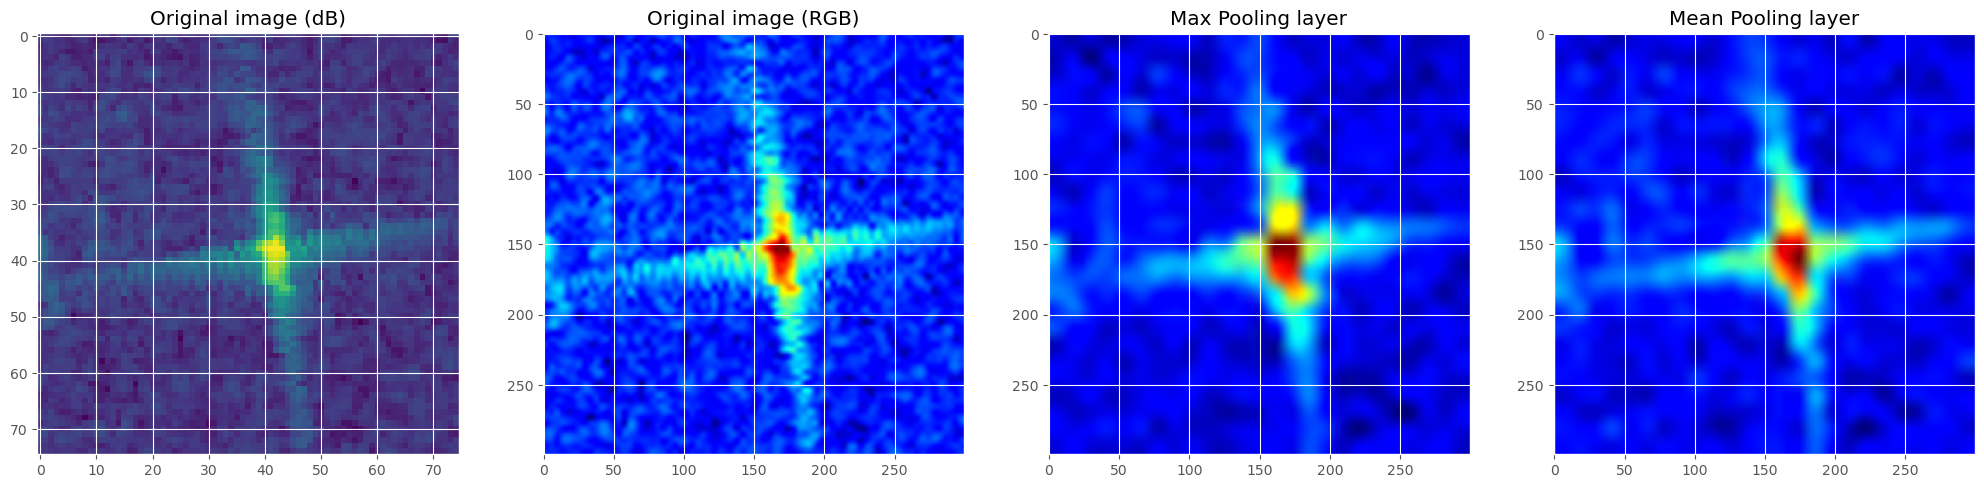

In [168]:
plt.figure(figsize = (25,25))
plt.subplot(1,4,1)
plt.imshow(arr)
plt.title("Original image (dB)")
plt.subplot(1,4,2)
plt.imshow(im)
plt.title("Original image (RGB)")
plt.subplot(1,4,3)
im1 = maxPoolingLayer(arr, 25)
plt.imshow(im1)
plt.title("Max Pooling layer")
plt.subplot(1,4,4)
im1 = meanPoolingLayer(arr, 25)
plt.imshow(im1)
plt.title("Mean Pooling layer")
plt.show()

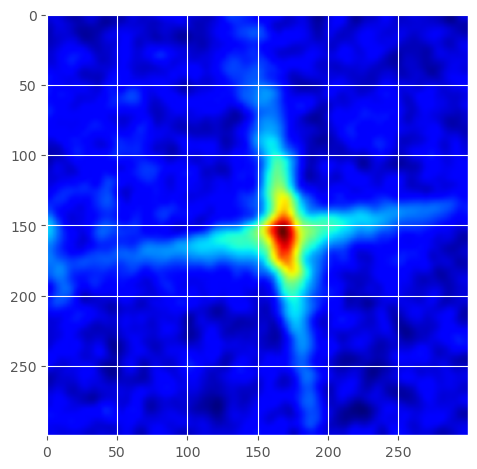

In [175]:
plt.figure(figsize = (25,25))
plt.subplot(1, 4, 1)
img1 = filters.gaussian(arr, sigma = 1)
plt.imshow(to_RGB(img1))
plt.show()

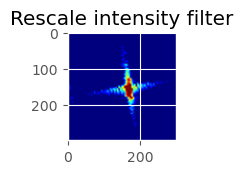

In [184]:
plt.subplot(1,4,2)
arr_float = 1.0 * arr
arr_rescale = exposure.rescale_intensity(arr_float, in_range=(-10, 15))
plt.imshow(to_RGB(arr_rescale))
plt.title("Rescale intensity filter");

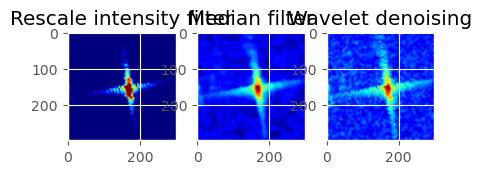

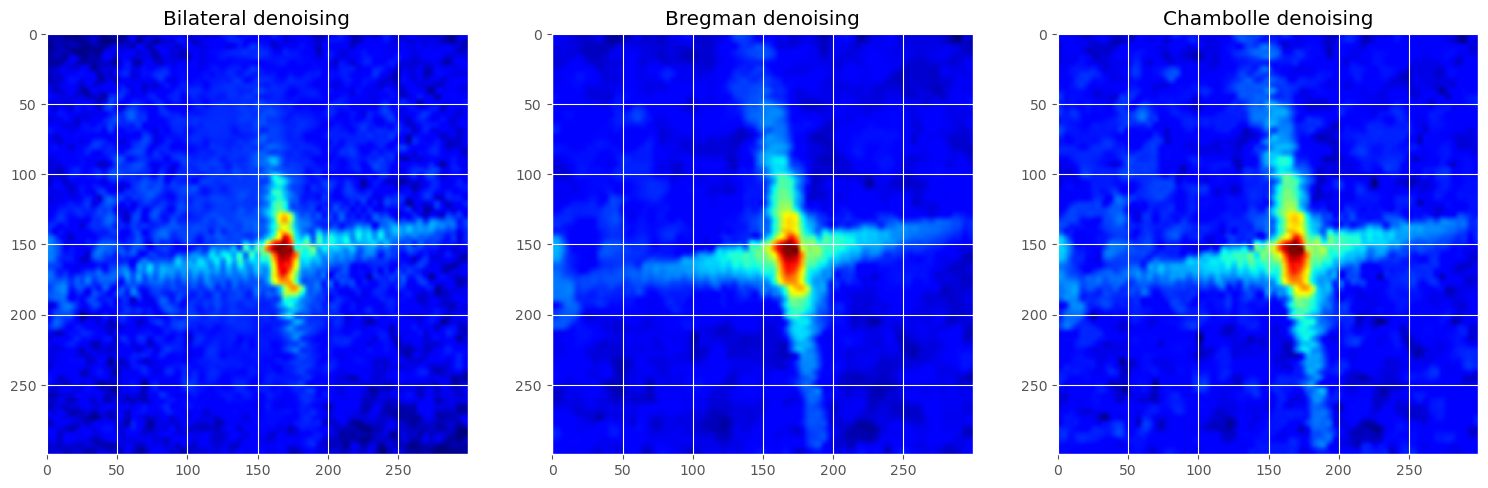

In [187]:
plt.subplot(1,4,2)
arr_float = 1.0 * arr
arr_rescale = exposure.rescale_intensity(arr_float, in_range=(-10, 15))
plt.imshow(to_RGB(arr_rescale))
plt.title("Rescale intensity filter")

plt.subplot(1,4,3)                                             
med = median(arr_uint, morphology.disk(2))
plt.imshow(to_RGB(med))                                  
plt.title("Median filter")

plt.subplot(1,4,4)                                          
img2 = restoration.denoise_wavelet(arr_uint, multichannel = False, sigma = 0.03)
plt.imshow(to_RGB(img2))
plt.title("Wavelet denoising")

plt.figure(figsize = (25,25))

plt.subplot(1,4,1)
denoised_1 = restoration.denoise_bilateral(arr_uint, multichannel=False, sigma_color=0.1, sigma_spatial=10) 
plt.imshow(to_RGB(denoised_1))
plt.title("Bilateral denoising")

plt.subplot(1,4,2)
denoised_2 = restoration.denoise_tv_bregman(arr, weight = 0.4, max_iter=100, eps=0.001, isotropic=True)
plt.imshow(to_RGB(denoised_2))
plt.title("Bregman denoising")

plt.subplot(1,4,3)
denoised_3 = restoration.denoise_tv_chambolle(arr, weight=0.8, eps=0.0002, n_iter_max=200, multichannel=False)
plt.imshow(to_RGB(denoised_3))
plt.title("Chambolle denoising")

plt.show()

In [188]:
from skimage.filters import try_all_threshold

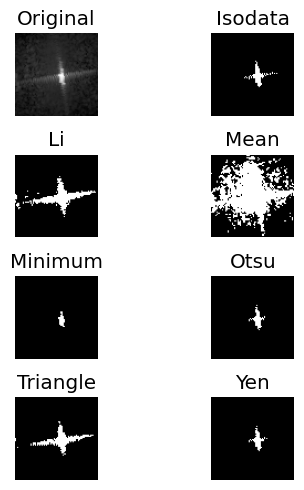

In [191]:
arr = np.reshape(np.array(data[data.is_iceberg==0].iloc[5,1]),(75,75))
normalized = (arr-np.min(arr))/(np.max(arr)-np.min(arr)) # normalisation de l'intensité entre 0 et 1
arr_uint = np.uint8(255*normalized)
denoised_bilateral = restoration.denoise_bilateral(arr_uint, multichannel=False, sigma_color=0.1, sigma_spatial=10)
imgBL = denoised_bilateral
    
fig, ax = try_all_threshold(imgBL, figsize=(5, 5), verbose=False)

plt.show()

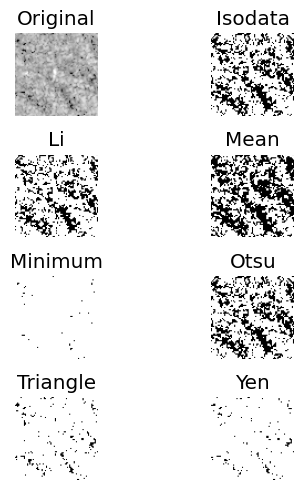

In [193]:
arr = np.reshape(np.array(data[data.is_iceberg==0].iloc[35,1]),(75,75))
normalized = (arr-np.min(arr))/(np.max(arr)-np.min(arr)) # normalisation de l'intensité entre 0 et 1
arr_uint = np.uint8(255*normalized)
denoised_bilateral = restoration.denoise_bilateral(arr_uint, multichannel=False, sigma_color=0.1, sigma_spatial=10)
imgBL = denoised_bilateral
    
fig, ax = try_all_threshold(imgBL, figsize=(5, 5), verbose=False)

plt.show()

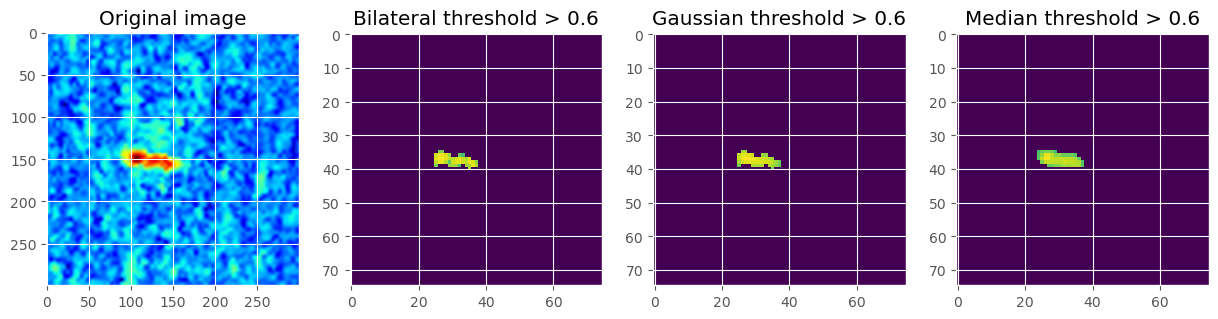

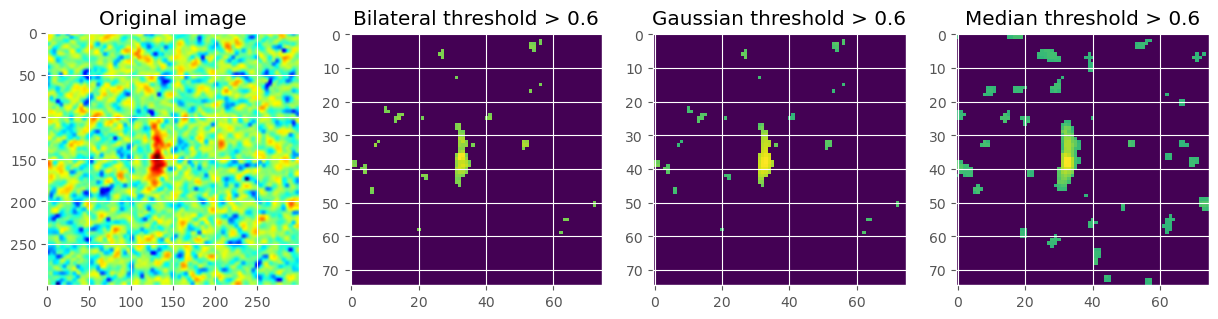

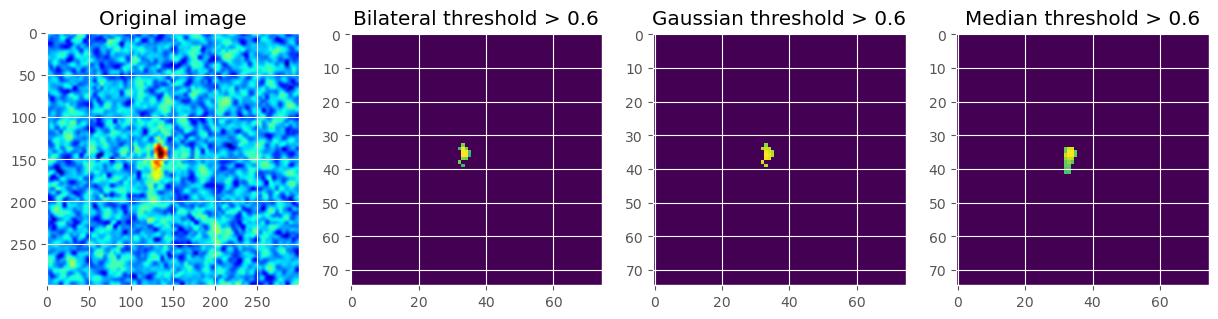

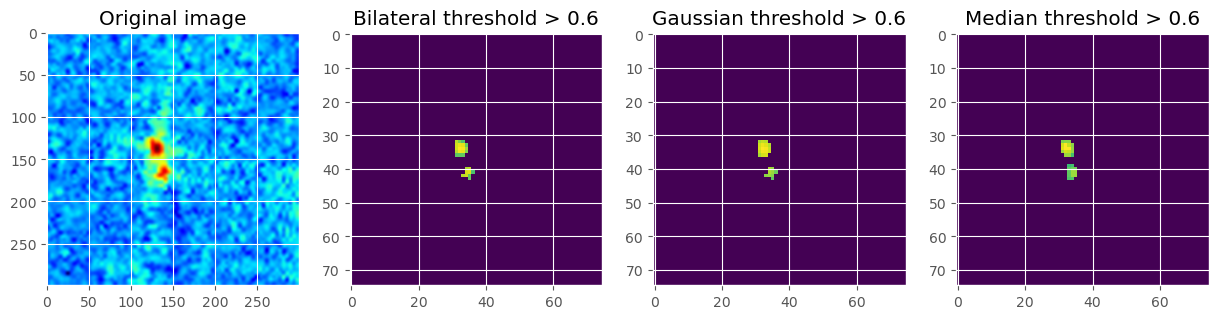

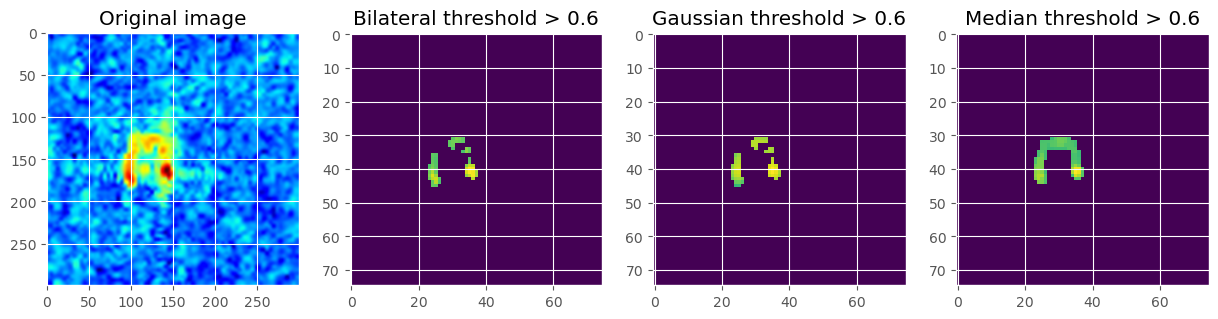

In [194]:
for i in range(20,25):
    arr = np.reshape(np.array(ex_shi.iloc[i,1]),(75,75))
    normalized = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
    arr_uint = np.uint8(255*normalized)
    
    imgBL = to_RGB(arr)
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(141)
    plt.imshow(imgBL)
    plt.title("Original image")
    
    plt.subplot(142)
    denoised_1 = restoration.denoise_bilateral(arr_uint, multichannel=False, sigma_color=0.1, sigma_spatial=10) 
    p = denoised_1 > 0.6
    plt.imshow(p*denoised_1)
    plt.title("Bilateral threshold > 0.6")
    
    plt.subplot(143)
    denoised_2 = filters.gaussian(arr_uint, sigma = 2) 
    p = denoised_1 > 0.6
    plt.imshow(p*denoised_2)
    plt.title("Gaussian threshold > 0.6")
    
    plt.subplot(144)                                          
    med = median(arr_uint, morphology.disk(2))
    p = med > 255*0.6
    plt.imshow(p*med)                                  
    plt.title("Median threshold > 0.6")
    
    plt.show()


In [199]:
def morphologie(arr):
    image = img_as_float(np.reshape(np.array(arr), [75,75]))
    arr_uint = np.uint8(image)
    image = filters.gaussian(image, sigma = 1)
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image 
    dilated = morphology.reconstruction(seed, mask, method='dilation')
    return (image-dilated)

In [196]:
def highest_intensity(arr):
    t = np.reshape(np.array(arr),[1,75*75])
    p = arr > np.mean(t) + 2*np.std(t)
    return (p*arr) 

In [202]:
def small_objects_removal(arr):
    
    t = np.reshape(np.array(arr),[1,75*75])
    p = arr > np.mean(t) + 2*np.std(t)
    
    label_img = measure.label(p)
    props = measure.regionprops(label_img) # référencement des différentes propriétés des objets de l'image
    centroid = [props[i].centroid for i in range(len(props))] # coordonnées des centroïds
    d_centre_centroid = [(centroid[i][0]-75/2)**2 + (centroid[i][1]-75/2)**2 for i in range(len(props))] # distances au centre de l'image
    central_object_index = d_centre_centroid.index(min(d_centre_centroid)) # indice dans props de l'objet central
    a = props[central_object_index].area # aire de l'objet central
    
    q = morphology.remove_small_objects(p, min_size=a, connectivity=1, in_place=False) # suppression des petits objets

    return (q*arr)

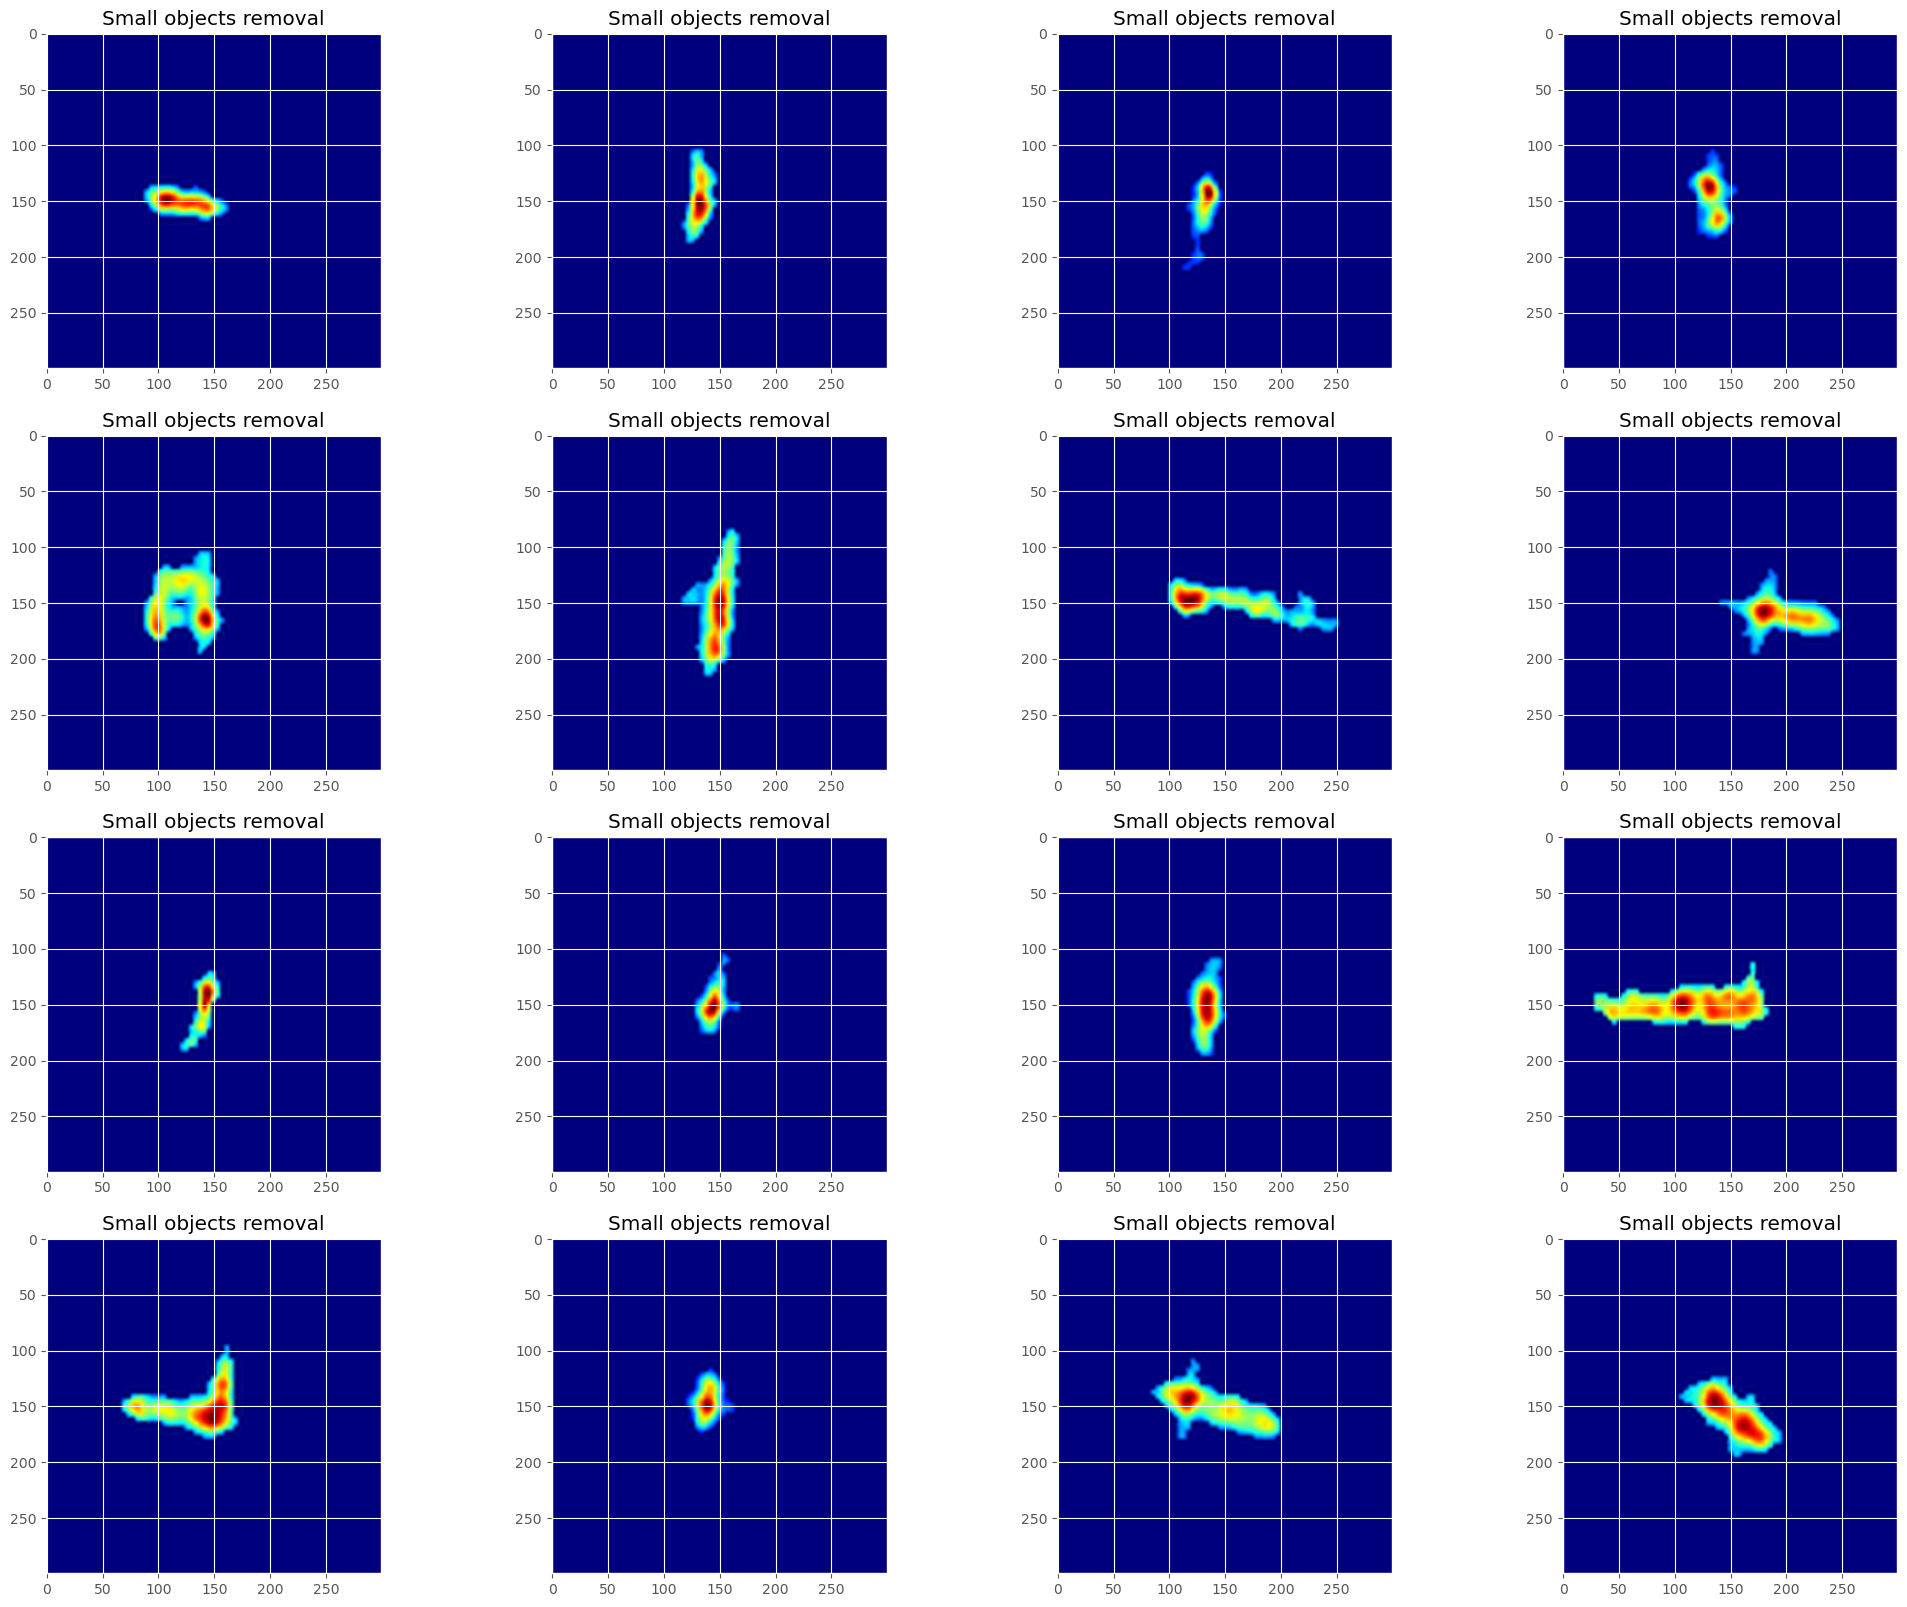

In [203]:
import warnings
warnings.filterwarnings("ignore")

    
plt.figure(figsize=(25,20))
    
for i in range(20,20+16):

    
    arr = ex_shi.iloc[i,1]
    img = np.reshape(np.array(arr),(75,75))
    normalized = (img-np.min(img))/(np.max(img)-np.min(img))
    arr_uint = np.uint8(255*normalized)
    #img = to_RGB(img)

    #plt.subplot()
    #plt.imshow(img)
    #plt.title("Original image")

    im = morphologie(arr)
    im1 = highest_intensity(im)
    
    plt.subplot(4,4,i-19)
    im2 = small_objects_removal(im1)
    plt.imshow(to_RGB(im2))
    plt.title("Small objects removal")
    
    
plt.show()

In [204]:
def iso(arr):
    
    ## Morphology
    image = img_as_float(np.reshape(np.array(arr), [75,75]))
    arr_uint = np.uint8(image)
    image = filters.gaussian(image, sigma = 1)
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image 
    dilated = morphology.reconstruction(seed, mask, method='dilation')
    new_arr = image-dilated
    
    
    ## Highest intensity
    t = np.reshape(np.array(new_arr),[1,75*75])
    p = new_arr > np.mean(t) + 2*np.std(t)
    new_arr = p*new_arr

    
    ## Small objects removal

    label_img = measure.label(p)

    props = measure.regionprops(label_img)
    centroid = [props[i].centroid for i in range(len(props))]
    d_centre_centroid = [(centroid[i][0]-75/2)**2 + (centroid[i][1]-75/2)**2 for i in range(len(props))] 
    central_object_index = int(d_centre_centroid.index(min(d_centre_centroid)))
    a = props[central_object_index].area
    
    l = 0
    
    while l == 0 :
        p = morphology.remove_small_objects(measure.label(p), min_size= a)
        props = measure.regionprops(measure.label(p), intensity_image = image)
        l = len(props)

    max_ints = [props[i].max_intensity for i in range(len(props))]
    main_object_index = int(max_ints.index(max(max_ints)))
    props_central_object = props[main_object_index]
    
    return (p*new_arr, props_central_object, l)

In [208]:
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

0it [00:00, ?it/s]


In [206]:
data["iso1"] = data["band_1"].progress_apply(lambda x : iso(x)[0])

1604it [00:21, 76.09it/s] 


In [209]:
data["iso2"] = data["band_2"].progress_apply(lambda x : iso(x)[0])

data["props1"] = data["band_1"].progress_apply(lambda x : iso(x)[1])
data["props2"] = data["band_2"].progress_apply(lambda x : iso(x)[1])

data["nbBlocks1"] = data["iso1"].progress_apply(lambda x : iso(x)[2])
data["nbBlocks2"] = data["iso2"].progress_apply(lambda x : iso(x)[2])

data["morpho1"] = data["band_1"].progress_apply(morphologie)
data["morpho2"] = data["band_2"].progress_apply(morphologie)

1604it [00:30, 52.61it/s] 
100%|█████████████████████████████████████████████████████████████████████████████| 1604/1604 [00:03<00:00, 506.66it/s]


In [210]:
for label in [1,2]:
    data['max'+str(label)] = data['morpho'+str(label)].apply(np.max)
    data['std'+str(label)] = data['morpho'+str(label)].apply(np.std)
    data['mean'+str(label)] = data['morpho'+str(label)].apply(np.mean)
    data['med'+str(label)] = data['morpho'+str(label)].apply(np.median)
    data['L1norm'+str(label)] = data['morpho'+str(label)].apply(lambda x : np.linalg.norm(x,1))
    data['L2norm'+str(label)] = data['morpho'+str(label)].apply(lambda x : np.linalg.norm(x,2))

In [211]:
def plot_var(data,var):

    minval, maxval = data[var+"1"].min(), data[var+"1"].max()
    fig1 = plt.figure(figsize = (20,5))
    fig1.suptitle('HV polarization, histogramme de la variable '+var, fontsize=25)
    plt.subplot(1,2,1)
    plt.hist(data[var+"1"].where(data.is_iceberg == 0) , range=[minval,maxval], bins=50,color='b',alpha=0.5,label='Ship')
    plt.xlim([minval,maxval])
    plt.xlabel(var)
    plt.legend()
    plt.subplot(1,2,2)
    plt.hist(data[var+"1"].where(data.is_iceberg == 1) , range=[minval,maxval], bins=50,color='r',alpha=0.5,label='Ice')
    plt.xlim([minval,maxval])
    plt.xlabel(var)
    plt.legend()

    minval, maxval = data[var+"2"].min(), data[var+"2"].max()
    fig2 = plt.figure(figsize = (20,5))
    fig2.suptitle('HH polarization, histogramme de la variable '+var, fontsize=25)
    plt.subplot(1,2,1)
    plt.hist(data[var+"2"].where(data.is_iceberg == 0) , range=[minval,maxval], bins=50,color='b',alpha=0.5,label='Ship')
    plt.subplot(1,2,2)
    plt.hist(data[var+"2"].where(data.is_iceberg == 1) , range=[minval,maxval], bins=50,color='r',alpha=0.5,label='Ice')

    plt.show()

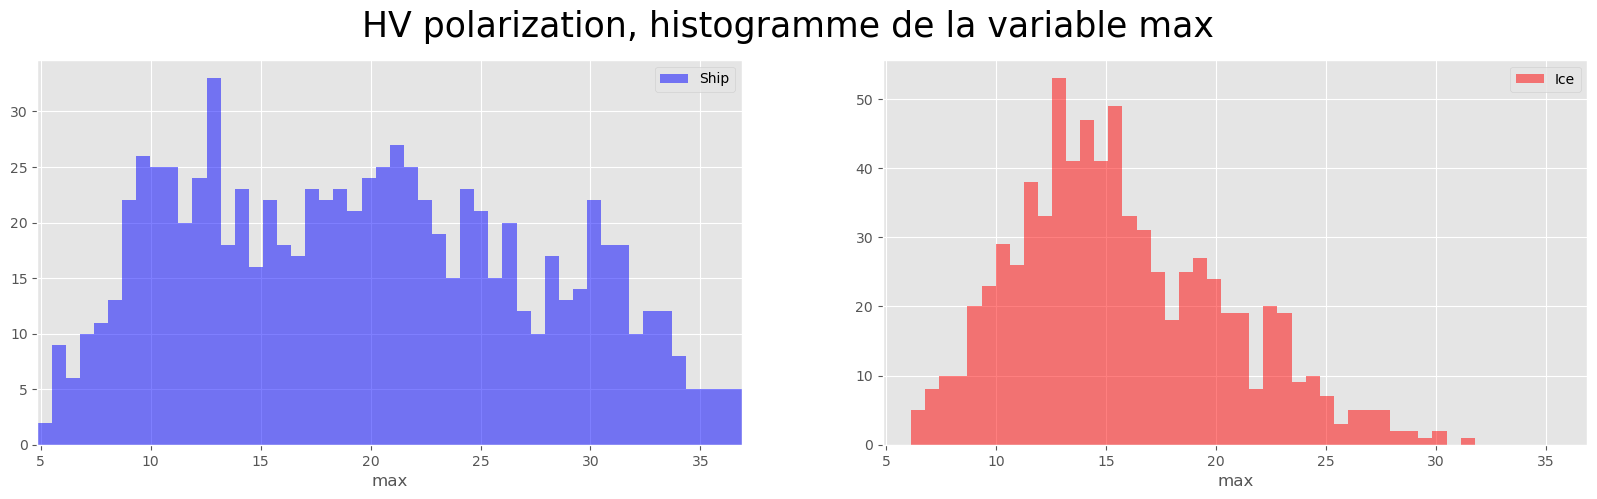

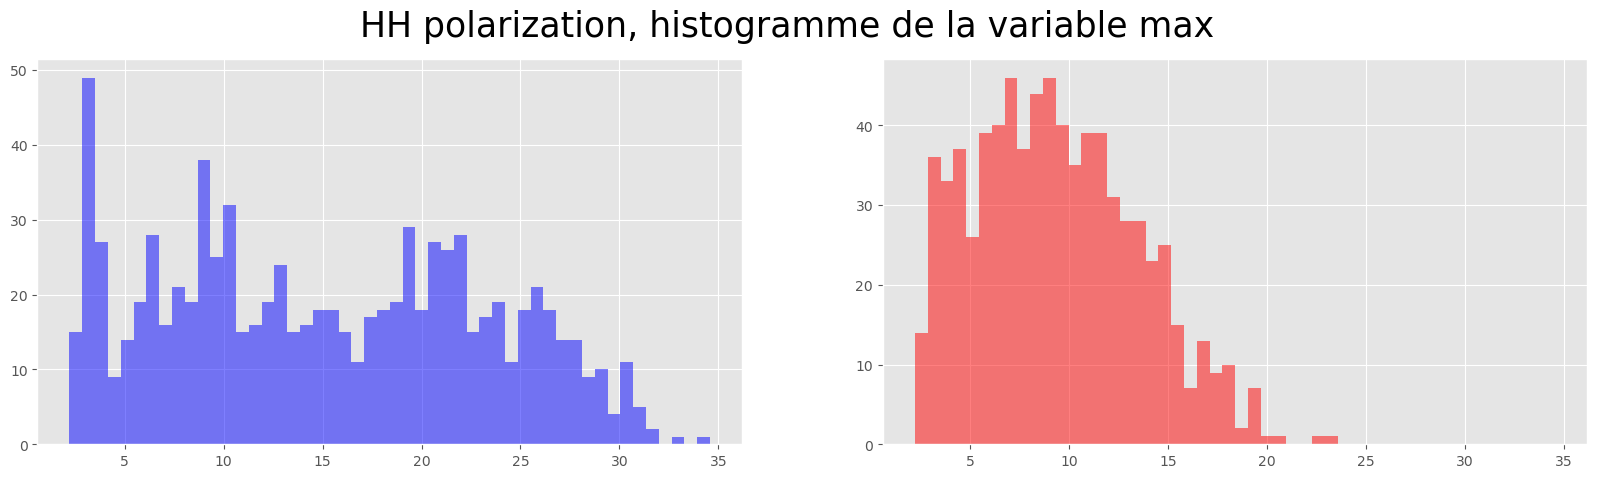

In [213]:
plot_var(data, "max")

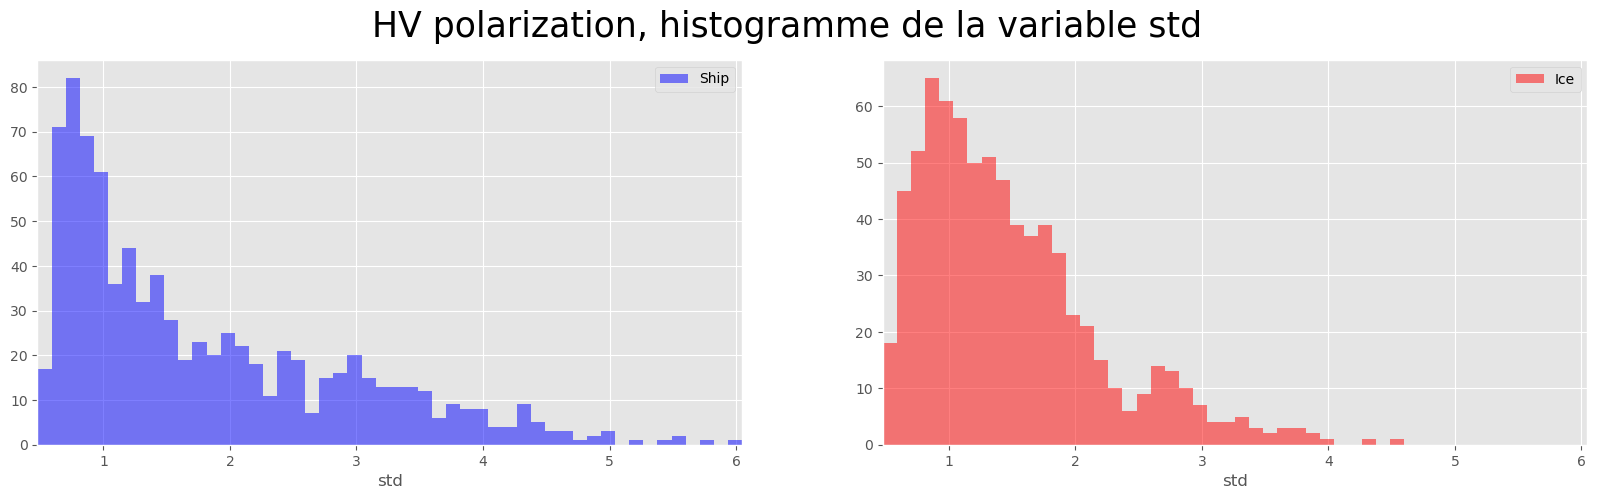

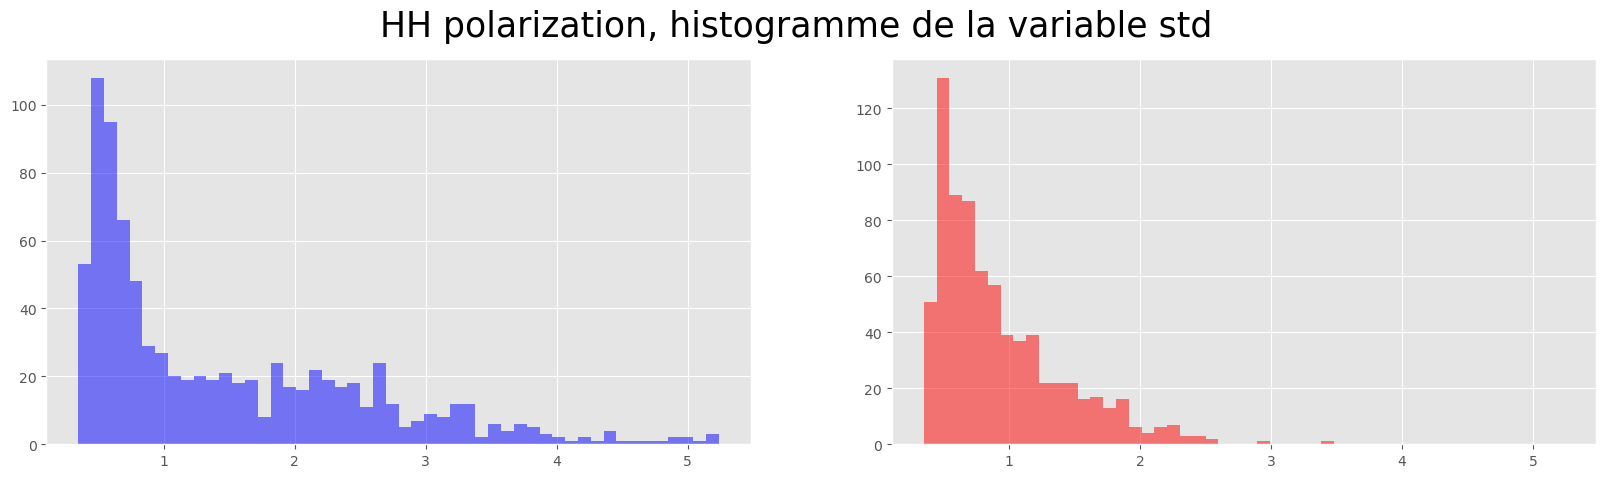

In [214]:
plot_var(data,"std")

In [215]:
for lbl in [1,2]:
    data['size'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.area)
    data['perimeter'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.perimeter)
    data['major_axis_length'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.major_axis_length)
    data['minor_axis_length'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.minor_axis_length)
    data['orientation'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.orientation)
    data['inertia_tensor_h_eigvals'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.inertia_tensor_eigvals[0])
    data['inertia_tensor_l_eigvals'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.inertia_tensor_eigvals[1])
    data['moments'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.moments)
    data['moments_hu'+str(lbl)] = data['props'+str(lbl)].progress_apply(lambda x : x.moments_hu)
    data['maj_min_ratio'+str(lbl)] = data['major_axis_length'+str(lbl)]/data['minor_axis_length'+str(lbl)]

100%|███████████████████████████████████████████████████████████████████████████| 1604/1604 [00:00<00:00, 22963.74it/s]


In [216]:
data.columns

Index(['id', 'band_1', 'band_2', 'inc_angle', 'is_iceberg', 'iso1', 'iso2',
       'props1', 'props2', 'nbBlocks1', 'nbBlocks2', 'morpho1', 'morpho2',
       'max1', 'std1', 'mean1', 'med1', 'L1norm1', 'L2norm1', 'max2', 'std2',
       'mean2', 'med2', 'L1norm2', 'L2norm2', 'size1', 'perimeter1',
       'major_axis_length1', 'minor_axis_length1', 'orientation1',
       'inertia_tensor_h_eigvals1', 'inertia_tensor_l_eigvals1', 'moments1',
       'moments_hu1', 'maj_min_ratio1', 'size2', 'perimeter2',
       'major_axis_length2', 'minor_axis_length2', 'orientation2',
       'inertia_tensor_h_eigvals2', 'inertia_tensor_l_eigvals2', 'moments2',
       'moments_hu2', 'maj_min_ratio2'],
      dtype='object')

In [217]:
n = data.shape[0]

In [218]:
n

1604

In [219]:
def resize(arr):
    return np.reshape(arr,(75*75))

b1 = data["iso1"].progress_apply(resize)
b2 = data["iso2"].progress_apply(resize)
b = [np.concatenate((b1[i],b2[i])) for i in range(n)]
np.shape(b)

100%|██████████████████████████████████████████████████████████████████████████| 1604/1604 [00:00<00:00, 321636.16it/s]


(1604, 11250)

In [221]:
len(b)

1604

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
XP = pca.fit_transform(b)

In [224]:
len(XP)

1604

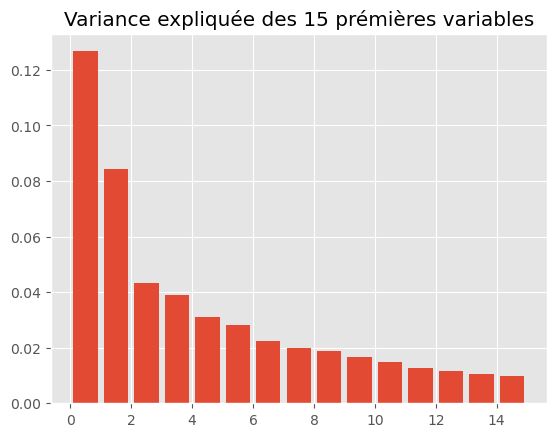

<Figure size 1800x600 with 0 Axes>

In [225]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)) + 0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée des 15 prémières variables")

plt.figure(figsize = (18, 6))
plt.show()

In [232]:
import pandas as pd

X = pd.DataFrame()
IMG = pd.DataFrame()


In [233]:
for i in [1,2]:
    X['max'+str(i)] = data['max'+str(i)]
    X['std'+str(i)] = data['std'+str(i)]
    X['size'+str(i)] = data['size'+str(i)]
    X['mean'+str(i)] = data['mean'+str(i)]
    X['med'+str(i)] = data['med'+str(i)]
    X['L1norm'+str(i)] = data['L1norm'+str(i)]
    X['perimeter'+str(i)] = data['perimeter'+str(i)]
    X['major_axis_length'+str(i)] = data['major_axis_length'+str(i)]
    X['minor_axis_length'+str(i)] = data['minor_axis_length'+str(i)]
    X['maj_min_ratio'+str(i)] = data['maj_min_ratio'+str(i)]
    X['inertia_tensor_l_eigvals'+str(i)] = data['inertia_tensor_l_eigvals'+str(i)]
    X['inertia_tensor_h_eigvals'+str(i)] = data['inertia_tensor_h_eigvals'+str(i)]
    X['iso'+str(i)] = data['iso'+str(i)]

    # On ajoute également le carré des variables précédentes au modèle
    X['max_c'+str(i)] = X['max'+str(i)]**2
    X['mean_c'+str(i)] = X['mean'+str(i)]**2
    X['med_c'+str(i)] = X['med'+str(i)]**2
    X['size_c'+str(i)] = X['size'+str(i)]**2
    X['perimeter_c'+str(i)] = X['perimeter'+str(i)]**2
    X['std_c'+str(i)] = X['std'+str(i)]**2
    X['major_axis_length_c'+str(i)] = X['major_axis_length'+str(i)]**2
    X['minor_axis_length_c'+str(i)] = X['minor_axis_length'+str(i)]**2
    X['maj_min_ratio_c'+str(i)] = X['maj_min_ratio'+str(i)]**2

In [234]:
for i in range(15):
    X['PCA'+str(i)]=XP[:,i]


In [235]:
X['inc_angle'] = data['inc_angle']
X['is_iceberg'] = data["is_iceberg"]
X['inc_angle'] = pd.to_numeric(X['inc_angle'],errors='coerce')
X = X.dropna()

Y = X['is_iceberg']
X = X.drop(["is_iceberg"],axis=1)

IMG['iso1'] = X['iso1']
IMG['iso2'] = X['iso2']
X = X.drop(['iso1'],axis=1)
X = X.drop(['iso2'],axis=1)

Xdf = X

In [237]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [238]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [239]:
from sklearn.model_selection import cross_val_score
best_c = None
best_s = 0

# SVM
from sklearn import svm

# Linear SVM
k='linear'
for j in range(8):
    clf = svm.SVC(kernel=k, C=10**(j-5), probability=True)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    if scores.mean()>best_s:
        best_s=scores.mean()
        best_c=clf
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 0.00)
Accuracy: 0.58 (+/- 0.02)
Accuracy: 0.84 (+/- 0.04)
Accuracy: 0.86 (+/- 0.03)
Accuracy: 0.87 (+/- 0.02)
Accuracy: 0.87 (+/- 0.02)


In [240]:
# rbf SVM
k='rbf'
for j in range(10):
    for i in range(10):
        clf = svm.SVC(kernel=k, C=10**((j-2)/2),gamma=1/n*10**((i-4)/2), probability=True)
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        if scores.mean()>best_s:
            best_s=scores.mean()
            best_c=clf
            print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.04)
Accuracy: 0.88 (+/- 0.03)
Accuracy: 0.88 (+/- 0.02)


In [241]:
# poly SVM
k='poly'
for j in range(10):
    for i in range(8):
        clf = svm.SVC(kernel=k, C=10**((j-1)/2),degree=i+1, probability=True)
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        if scores.mean()>best_s:
            best_s=scores.mean()
            best_c=clf
            print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [242]:
print("meilleur classifieur SVM")
best_c

meilleur classifieur SVM


SVC(C=1000.0, gamma=0.0006234413965087282, probability=True)

In [243]:
best_c_SVM = best_c
best_c_SVM = best_c_SVM.fit(X_train,y_train)

print("Accuracy calculée sur la base test : %0.2f"% best_c_SVM.score(X_test,y_test))
print("Log-loss calculée sur la base test : %0.2f"% log_loss(y_test,best_c_SVM.predict(X_test)))
print("Accuracy calculée sur la base d'entrainement : %0.2f"% best_c_SVM.score(X_train,y_train))
print("Log-loss calculée sur la base d'entrainement : %0.2f"% log_loss(y_train,best_c_SVM.predict(X_train)))

Accuracy calculée sur la base test : 0.89
Log-loss calculée sur la base test : 3.66
Accuracy calculée sur la base d'entrainement : 0.93
Log-loss calculée sur la base d'entrainement : 2.41


In [244]:
from sklearn.ensemble import GradientBoostingClassifier

best_c = None
best_s = 0

for j in range(5,100):
    clf = GradientBoostingClassifier(n_estimators=i)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    if scores.mean()>best_s:
        best_s=scores.mean()
        best_c=clf
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.05)


In [245]:
best_c_GBC = best_c
best_c_GBC = best_c_GBC.fit(X_train,y_train)

print("Accuracy calculée sur la base test : %0.2f"% best_c_GBC.score(X_test,y_test))
print("Log-loss calculée sur la base test : %0.2f"% log_loss(y_test,best_c_GBC.predict(X_test)))
print("Accuracy calculée sur la base d'entrainement : %0.2f"% best_c_GBC.score(X_train,y_train))
print("Log-loss calculée sur la base d'entrainement : %0.2f"% log_loss(y_train,best_c_GBC.predict(X_train)))

Accuracy calculée sur la base test : 0.79
Log-loss calculée sur la base test : 7.23
Accuracy calculée sur la base d'entrainement : 0.86
Log-loss calculée sur la base d'entrainement : 4.79


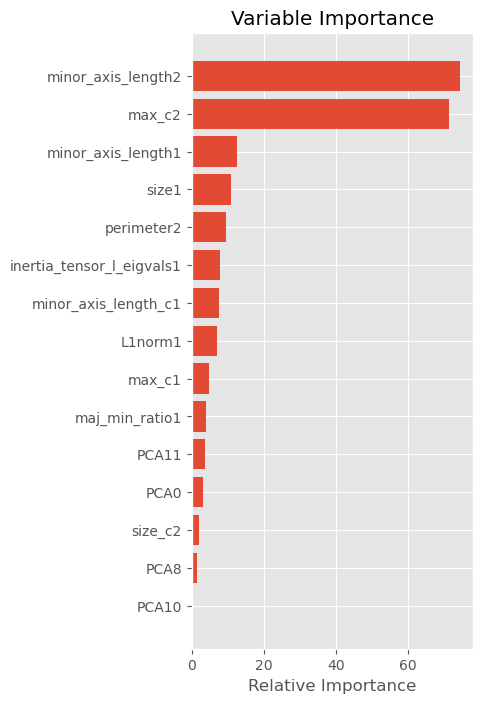

In [246]:
feature_name = Xdf.columns

limit = -1
feature_importance = best_c_GBC.feature_importances_[:limit]

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[limit-15:limit]
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_name[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [247]:
from sklearn.neural_network import MLPClassifier

best_c=None
best_s=0

for i in range(5):
    for j in range(5):
        for k in range(5):
            clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(70+10*(i+1),70+10*(i+1)), random_state=1,alpha=10**(-4-k))
            scores = cross_val_score(clf, X_train, y_train, cv=5)
            if scores.mean()>best_s:
                best_s=scores.mean()
                best_c=clf
                print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.03)
Accuracy: 0.85 (+/- 0.03)
Accuracy: 0.85 (+/- 0.03)
Accuracy: 0.86 (+/- 0.03)
Accuracy: 0.86 (+/- 0.01)
Accuracy: 0.86 (+/- 0.02)


In [248]:
print("meilleur classifieur Neural Network")
best_c

meilleur classifieur Neural Network


MLPClassifier(hidden_layer_sizes=(120, 120), random_state=1, solver='lbfgs')

In [249]:
best_c_NN = best_c
best_c_NN = best_c_NN.fit(X_train,y_train)

print("Accuracy calculée sur la base test : %0.2f"% best_c_NN.score(X_test,y_test))
print("Log-loss calculée sur la base test : %0.2f"% log_loss(y_test,best_c_NN.predict(X_test)))
print("Accuracy calculée sur la base d'entrainement : %0.2f"% best_c_NN.score(X_train,y_train))
print("Log-loss calculée sur la base d'entrainement : %0.2f"% log_loss(y_train,best_c_NN.predict(X_train)))

Accuracy calculée sur la base test : 0.85
Log-loss calculée sur la base test : 5.35
Accuracy calculée sur la base d'entrainement : 1.00
Log-loss calculée sur la base d'entrainement : 0.00


In [250]:
from sklearn.neighbors import KNeighborsClassifier
best_c=None
best_s=0

for i in range(4):
    clf = KNeighborsClassifier(n_neighbors=i+2)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    if scores.mean()>best_s:
        best_s=scores.mean()
        best_c=clf
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.03)
Accuracy: 0.84 (+/- 0.02)
Accuracy: 0.85 (+/- 0.02)


In [251]:
print("meilleur classifieur Neural Network")
best_c

meilleur classifieur Neural Network


KNeighborsClassifier(n_neighbors=4)

In [252]:
best_c_KNN = best_c
best_c_KNN = best_c_KNN.fit(X_train,y_train)

print("Accuracy calculée sur la base test : %0.2f"% best_c_KNN.score(X_test,y_test))
print("Log-loss calculée sur la base test : %0.2f"% log_loss(y_test,best_c_KNN.predict(X_test)))
print("Accuracy calculée sur la base d'entrainement : %0.2f"% best_c_KNN.score(X_train,y_train))
print("Log-loss calculée sur la base d'entrainement : %0.2f"% log_loss(y_train,best_c_KNN.predict(X_train)))

Accuracy calculée sur la base test : 0.85
Log-loss calculée sur la base test : 5.35
Accuracy calculée sur la base d'entrainement : 0.91
Log-loss calculée sur la base d'entrainement : 3.04


In [253]:
y_test

353     1
108     1
901     0
1083    0
758     0
       ..
1496    1
859     1
796     1
1045    1
754     0
Name: is_iceberg, Length: 368, dtype: int64

Area under the ROC curve - model SVM : 0.954078
Area under the ROC curve - model NN : 0.937469
Area under the ROC curve - model KNN : 0.898075


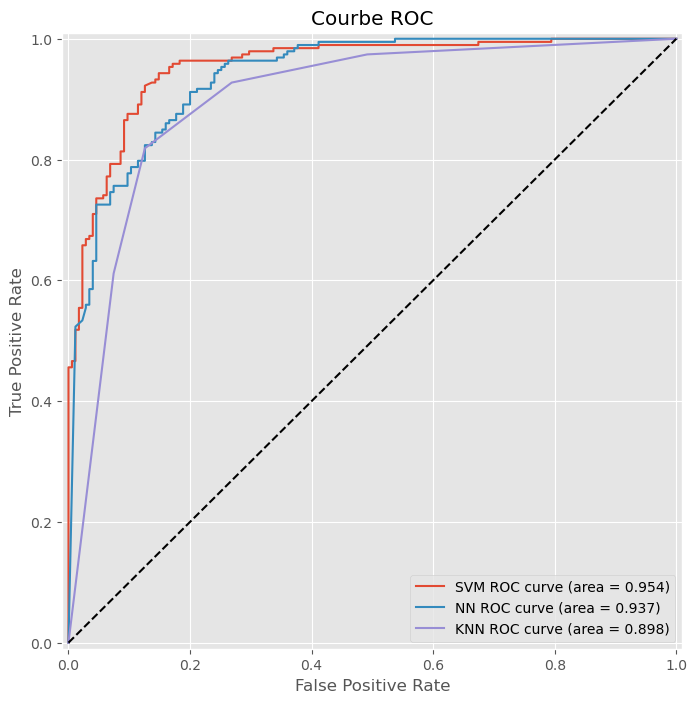

In [260]:
from sklearn.metrics import roc_curve, auc

fig = plt.figure(figsize = (8,8))
for model in ["SVM", "NN", "KNN"] : 
    if model == "SVM":
        probas = best_c_SVM.predict_proba(X_test)
    elif model == "NN" : 
        probas = best_c_NN.predict_proba(X_test)
    else : 
        probas = best_c_KNN.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test.ravel(), probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve - model "+model+" : %f" % roc_auc)

    plt.plot(fpr, tpr, label= model + ' ROC curve (area = %0.3f)' % roc_auc)
    plt.title('Courbe ROC')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

 MODELE AVEC CLASSIFIEUR SVM :

Confusion sur X_test : 
 [[0.4076 0.0679]
 [0.038  0.4864]]


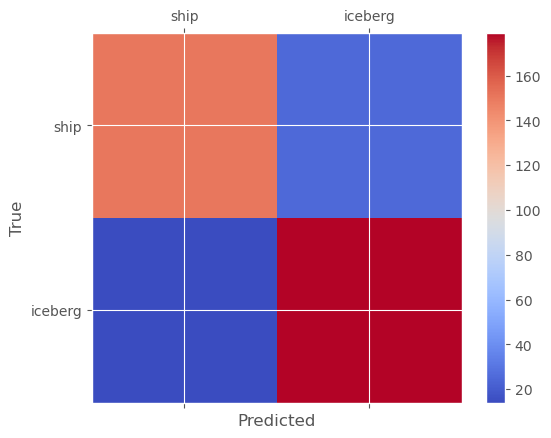

 MODELE AVEC CLASSIFIEUR NN :

Confusion sur X_test : 
 [[0.4076 0.0679]
 [0.087  0.4375]]


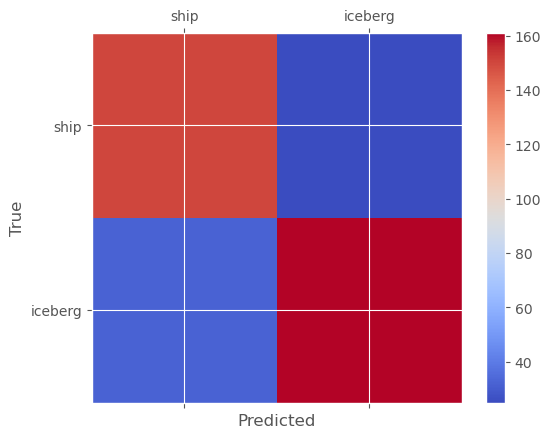

 MODELE AVEC CLASSIFIEUR KNN :

Confusion sur X_test : 
 [[0.4158 0.0598]
 [0.0951 0.4293]]


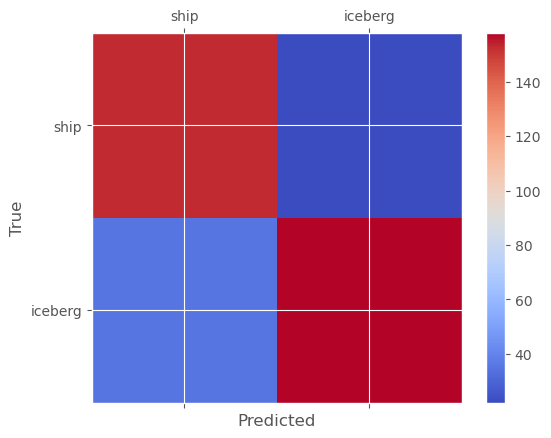

In [261]:
from sklearn.metrics import confusion_matrix
from matplotlib import cm

labels = ['ship', 'iceberg']

for model in ["SVM", "NN", "KNN"]:
    if model == "SVM":
        best_c = best_c_SVM
    elif model == "NN" : 
        best_c = best_c_NN
    else : 
        best_c = best_c_KNN
      
    print(" MODELE AVEC CLASSIFIEUR " + model + " :\n")
    i = 0
    for x,y in [(X_test, y_test) ]:
        i += 1
        yp  = best_c.predict(x)
        cmx = confusion_matrix(y, yp)
        cm_norm = np.around(cmx / np.sum(cmx),4)

        print("Confusion sur X_test : \n " +str(cm_norm))

        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cmx, cmap=cm.coolwarm)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [264]:
yt

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,

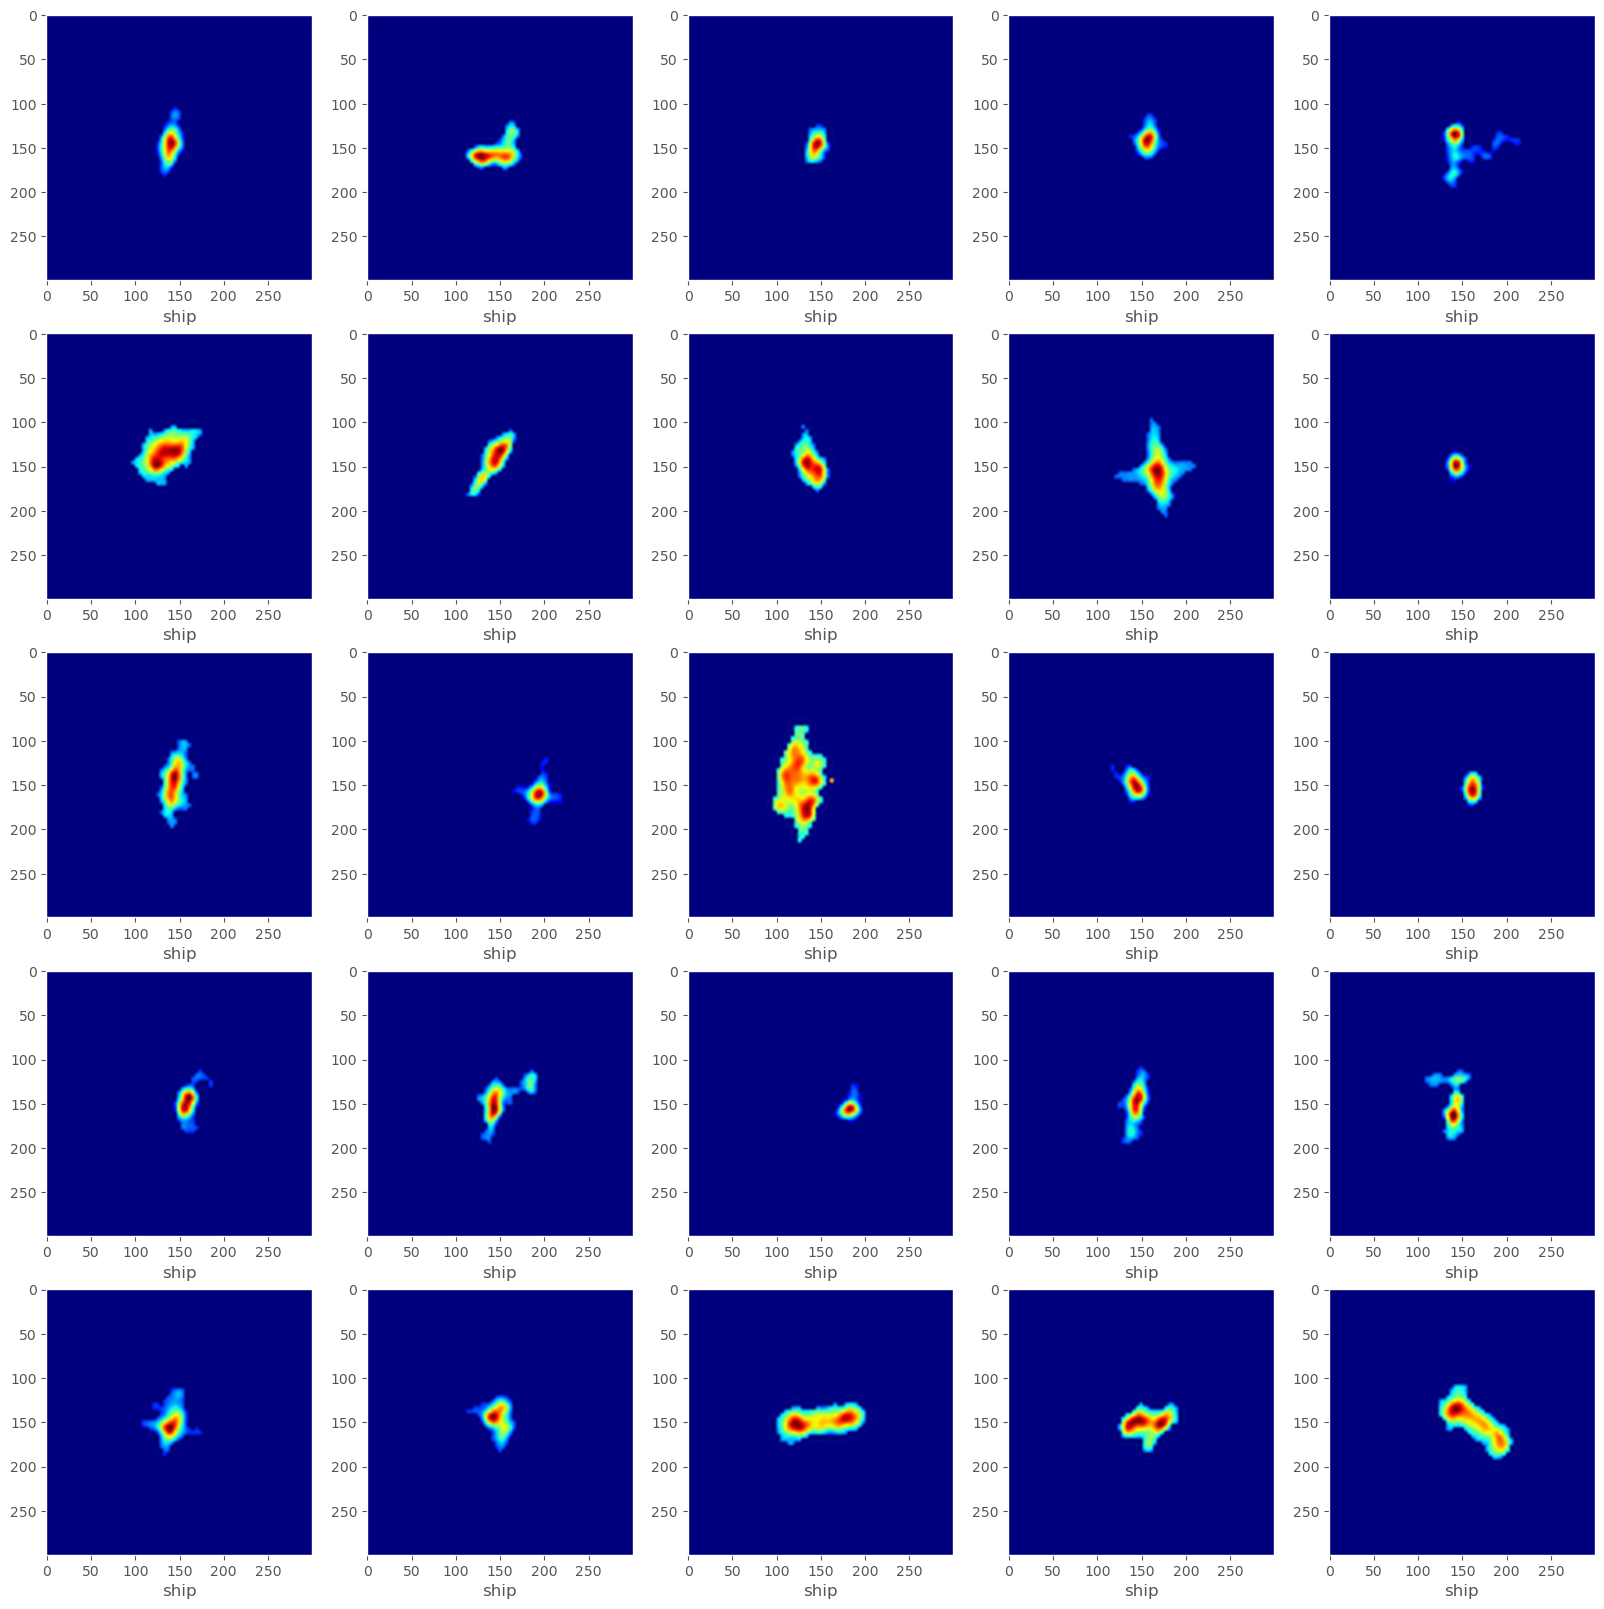

In [268]:
import random
pred = best_c_SVM.predict(X_test)
IMG1=np.array(IMG['iso1'])
yt=np.array(y_test)
# contient l'indice (numéro d'observation) des erreurs
ind_err=[]
for i in range(1,len(yt)):
    if yt[i]!=pred[i]:
        ind_err.append(i)
n_e=len(ind_err)

fig = plt.figure(figsize = (20,20))

for j in range(0,5):
    for i in range(1,6):  
        ax = fig.add_subplot(5,5,i+j*5)
        arr = IMG1[i+j*5-1]
        im = to_RGB(arr)
        ax.grid(False)
        ax.imshow(im)
        if yt[i+1]==1:
            ax.set_xlabel("iceberg")
        else :
            ax.set_xlabel("ship")

plt.show()
    

In [269]:
train = refresh()

# On génère la base de train en créant 3 bandes : band_1, band_2 et la somme des deux

X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [280]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers import Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint

In [281]:
X_train.shape

(1604, 75, 75, 3)

In [282]:
def getModel():
    
    gmodel=Sequential()
    
    # Filtre de convolution+maxpooling n°1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    # Filtre de convolution+maxpooling n°2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    # Filtre de convolution+maxpooling n°3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    # Filtre de convolution+maxpooling n°4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    # On aplatit les données pour appliquer les filtres de densité
    gmodel.add(Flatten())

    # Dense Layer 1
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    # Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    # Enfin on applique un Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))
    
    myoptim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    gmodel.compile(loss = 'binary_crossentropy', optimizer = myoptim, metrics = ['accuracy'])
    
    gmodel.summary()
    
    return gmodel
    

In [283]:
def get_callbacks(filepath, patience = 2):
    es = EarlyStopping('val_loss', patience=patience, mode ="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]    

In [284]:
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience = 5)

In [285]:
callbacks

In [289]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, target_train, random_state=1, train_size=0.75)

In [290]:
target_train

0       0
1       0
2       1
3       0
4       0
       ..
1599    0
1600    0
1601    0
1602    0
1603    0
Name: is_iceberg, Length: 1604, dtype: int64

In [291]:
import os

In [293]:
gmodel = getModel()
gmodel.fit(X_train_cv, y_train_cv,
           batch_size = 24,
           epochs = 20,
           verbose = 1,
           validation_data = (X_valid, y_valid),
           callbacks = callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 73, 73, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 17, 17, 128)      

In [295]:
gmodel.load_weights(filepath = file_path)
score = gmodel.evaluate(X_valid, y_valid, verbose=1)

print("Test Loss ", score[0])
print("Test Accuracy ", score[1])

13/13 [==============================] - 1s 45ms/step - loss: 0.2893 - accuracy: 0.8703
Test Loss  0.28927335143089294
Test Accuracy  0.8703241944313049


In [302]:
x = X_train_cv
y = y_train_cv

In [304]:
predicted_test=gmodel.predict(x)

38/38 [==============================] - 2s 47ms/step


In [305]:
predicted_test

array([[0.43546903],
       [0.86910653],
       [0.00903391],
       ...,
       [0.8963081 ],
       [0.29683128],
       [0.35137856]], dtype=float32)

Model : CNN 
 

38/38 [==============================] - 2s 45ms/step
Test : 
 [[0.4738 0.0565]
 [0.0366 0.4331]]
13/13 [==============================] - 1s 43ms/step
Test : 
 [[0.4713 0.0599]
 [0.0698 0.399 ]]


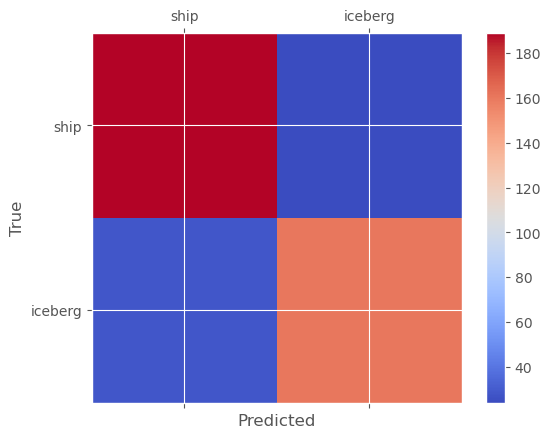

In [306]:
i = 0
labels = ['ship', 'iceberg']


print("Model : CNN \n \n")
for x,y in [ (X_train_cv, y_train_cv), (X_valid, y_valid) ]:
    i += 1
    predicted_test=gmodel.predict(x)
    yp = predicted_test.reshape((predicted_test.shape[0]))
    ypp = []
    for i in range(len(yp)):
        if yp[i] > 0.5 :
            ypp.append(1)
        else :
            ypp.append(0)
            
    cmx = confusion_matrix(y, ypp)
    cm_norm = np.around(cmx / np.sum(cmx),4)
    
    if i == 1 : 
        print("Train : \n " +str(cm_norm))
    else :
        print("Test : \n " +str(cm_norm))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx, cmap=cm.coolwarm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
gmodel.save()